In [234]:
# Importing all the libraries

import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import dmba
import seaborn as sns
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing Dataset created in Data Collection part
redfin_df = pd.read_csv('Group6_CleanData.csv')
redfin_df.head()

,City,Street Address,Property Type,ZipCode,Beds,Baths,List Price,Year Built,LivingArea,Price/SqFt,Lot Size,Redfin Estimate,Loan Details,DownPaymentPercentage,DownPaymentAmt,Est Mo Payment
0,San Francisco,107 Escolta Way,Single Family,94116,2,1.0,895000,1976,1325.93,675,6606.5,1036089,6.94,20,179000,5908
1,San Francisco,627 Cayuga Ave,Single Family,94112,2,1.0,995000,1936,1314.40,757,2613.0,1143192,6.88,20,199000,6533
2,San Francisco,3979 - 3981 17th St,Multi-Family,94114,3,2.5,3100000,1911,3021.44,1026,2495.0,1378504,6.94,20,620000,20462
3,San Francisco,821 Oak St,Condo,94117,3,3.0,1760000,1904,1773.27,750,2550.0,1758885,6.94,20,352000,11917
4,San Francisco,1427 - 1429 17th Ave,Multi-Family,94122,4,2.5,1695000,1926,3240.92,523,2996.0,1667081,6.88,20,339000,11129


In [7]:
# Checking for datatypes existing in different columns of the dataset
redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   830 non-null    object 
 1   Street Address         830 non-null    object 
 2   Property Type          830 non-null    object 
 3   ZipCode                830 non-null    object 
 4   Beds                   830 non-null    int64  
 5   Baths                  830 non-null    float64
 6   List Price             830 non-null    int64  
 7   Year Built             830 non-null    int64  
 8   LivingArea             830 non-null    float64
 9   Price/SqFt             830 non-null    int64  
 10  Lot Size               830 non-null    float64
 11  Redfin Estimate        830 non-null    int64  
 12  Loan Details           830 non-null    float64
 13  DownPaymentPercentage  830 non-null    int64  
 14  DownPaymentAmt         830 non-null    int64  
 15  Est Mo

In [30]:
#Checking for mean, 25%ile and 75%ile values for each numerical column to understand the dataset well
redfin_df.describe()

,Beds,Baths,List Price,Year Built,LivingArea,Price/SqFt,Lot Size,Redfin Estimate,Loan Details,DownPaymentPercentage,DownPaymentAmt,Est Mo Payment
count,830.000000,830.000000,8.300000e+02,830.000000,830.000000,830.000000,830.000000,8.300000e+02,830.000000,830.0,830.000000,830.000000
mean,3.092771,2.296386,1.192276e+06,1972.472289,1697.612060,732.200000,5886.510482,1.220099e+06,6.926120,20.0,238552.034940,8184.769880
std,1.086076,0.821594,4.991186e+05,31.725619,637.772644,192.938001,2155.819415,4.705948e+05,0.025316,0.0,100037.770651,3226.307231
min,1.000000,1.000000,6.950000e+04,1892.000000,459.560000,252.000000,964.000000,6.320700e+04,6.880000,20.0,13900.000000,456.000000
25%,2.000000,2.000000,8.022220e+05,1954.000000,1211.687500,611.250000,4783.500000,8.652265e+05,6.940000,20.0,160444.500000,5846.750000
50%,3.000000,2.000000,1.198444e+06,1976.000000,1631.810000,733.500000,6606.500000,1.303694e+06,6.940000,20.0,239600.000000,8106.000000
75%,4.000000,3.000000,1.499000e+06,1992.750000,2049.185000,843.750000,6606.500000,1.435311e+06,6.940000,20.0,299987.000000,10115.750000
max,7.000000,4.500000,3.100000e+06,2023.000000,3779.190000,1259.000000,12196.800000,2.470275e+06,6.940000,20.0,620000.000000,20462.000000


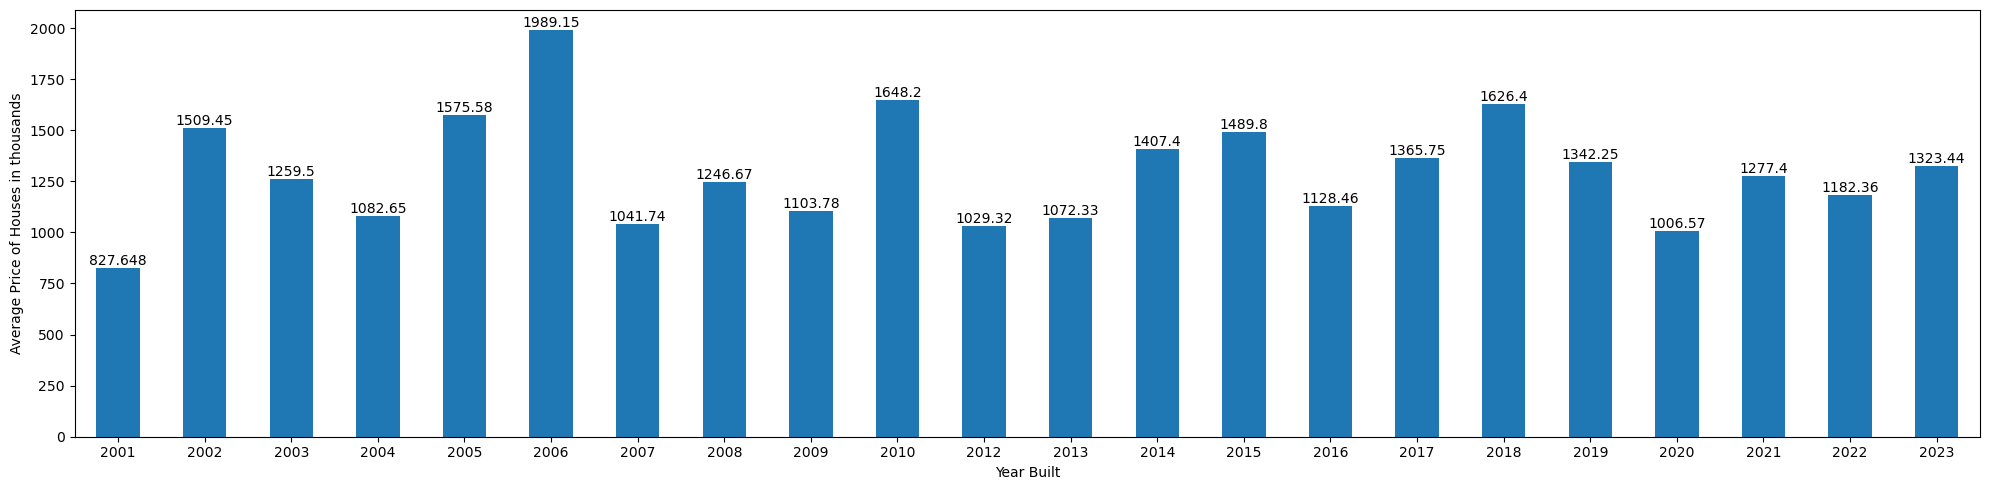

In [13]:
## Answering business oriented questions as a data analyst

#Question 1: How has been the trend of average home prices in Bay Area over the past 20 years? OR
#Question 1: When was the real estate market displaying a boom in prices or in demand in Bay Area?

redfin_recentyear_df = redfin_df[redfin_df['Year Built']>2000]
dataForPlot = redfin_recentyear_df.groupby('Year Built').mean()['List Price'] /1000
ax = dataForPlot.plot(kind='bar', figsize=[20, 5])
ax.set_ylabel('Average Price of Houses in thousands')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# Answer: As can be seen from the bar plot above, there hasn't been any significant pattern observed in average home prices.
# However, on closely observing the dataset, we see that the major rise in the price has been in 2006 which can be attributed
# to the housing bubble in US during this duration
# Similarly, we see a huge slump thereafter, which can be attributed to the 2008 market crash
# There has been a constant trend or a rise in the prices post this, with an exception of 2020 which was when then pandemic hit.
# Thus, we can conclude that, market influences the prices of the houses in Bay Area significantly.

# Answer: As can be seen from the bar plot, 2006, 2010 and 2018 were the years that saw a spectacular boom across the past 20
# years. The reason for 2006 could be attributed to housing bubble in US during that duration.
# In 2010, post the slump during financial crisis of 2008, market revival may have led to the boom
# In 2018, as can be seen,the real estate market had been performing really well consecutively and it was only during the pandemic,
# that the numbers went down.

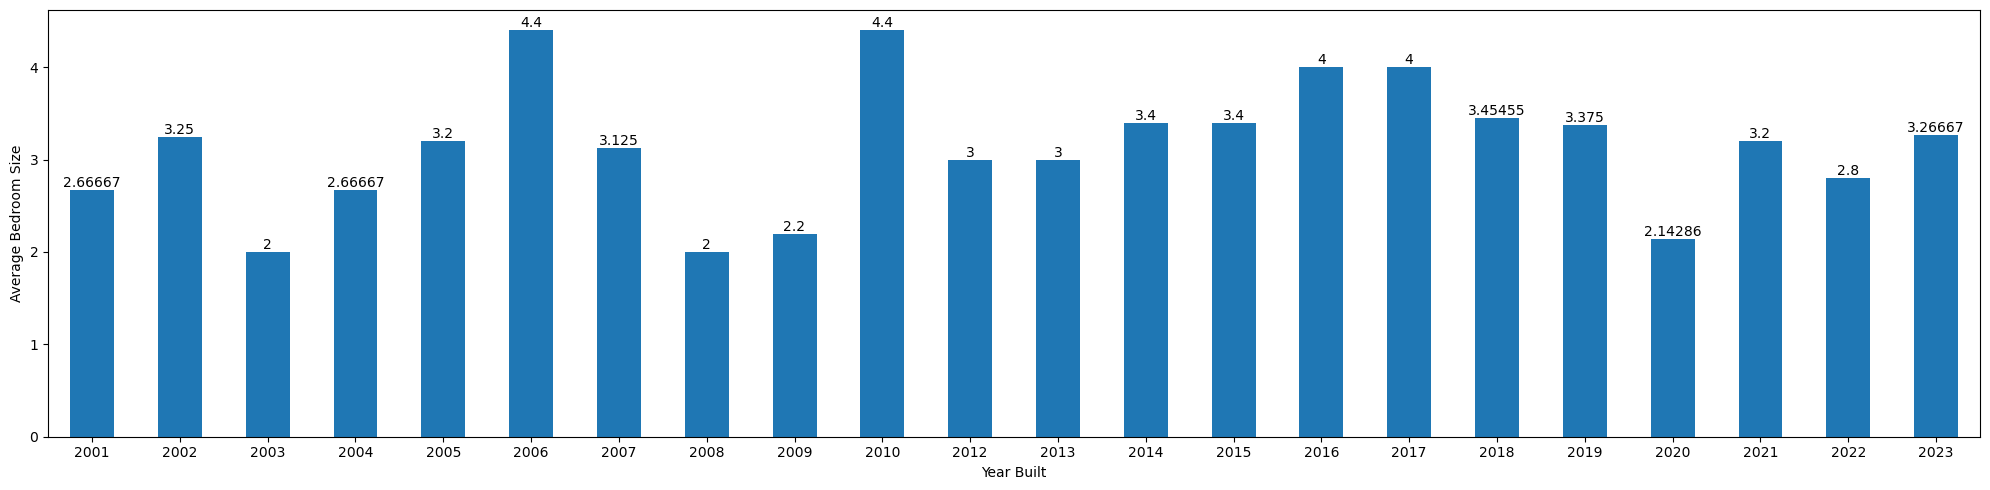

In [15]:
## Question 2: Has there been any change in terms of preference of bedroom size over the past 20 years among Bay Area customers?

redfin_recentyear_df = redfin_df[redfin_df['Year Built']>2000]
dataForPlot = redfin_recentyear_df.groupby('Year Built').mean()['Beds']
ax = dataForPlot.plot(kind='bar', figsize=[20, 5])
ax.set_ylabel('Average Bedroom Size')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# Answer: The plot for average bedroom size shows similar trends as the average prices of houses. The demand lowered in 
# 2008 and 2020 during the durations of crisis. However, more or less the average bedroom size has been around 2.5-4 for almost
# across the entire duration of past 20 years

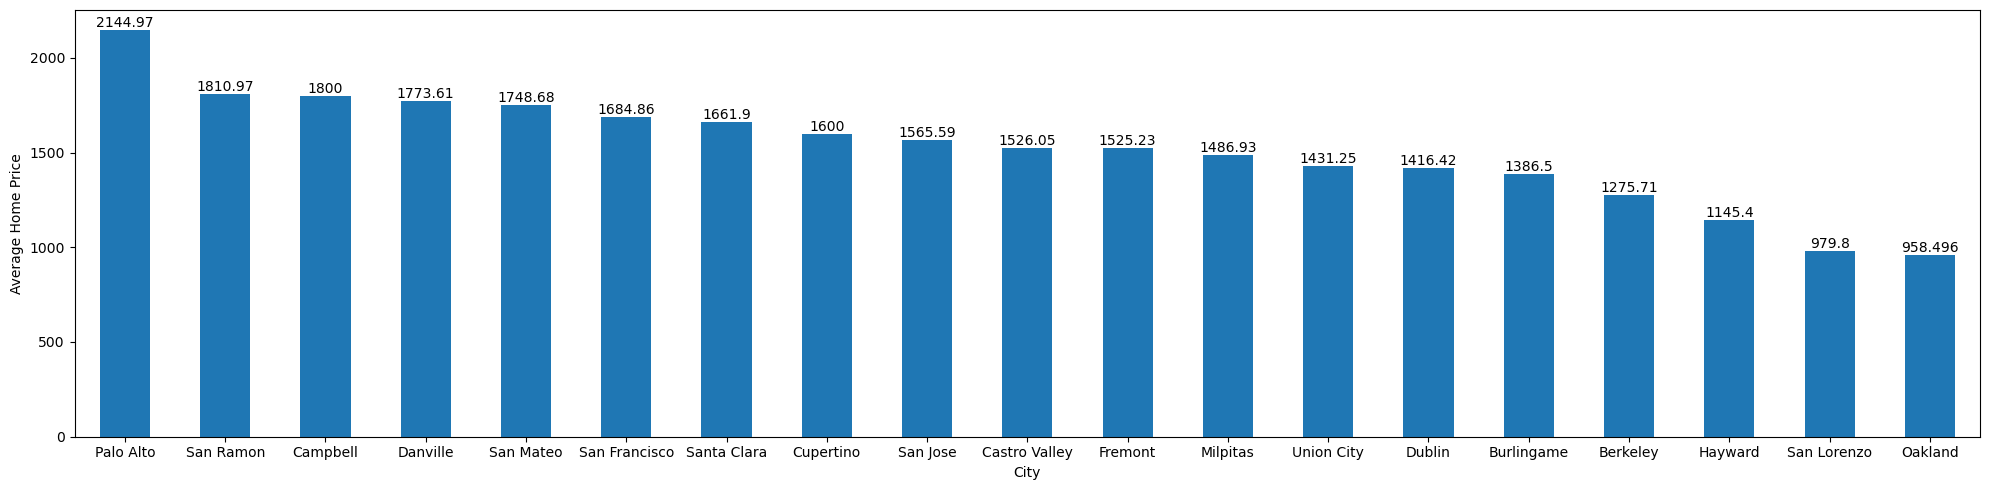

In [31]:
## Question 3: What is the average listing price of properties in each city?

# While the below plot gives us a rough idea on the average listing prices,
# We have divided this question into 2 parts in order to answer our next question
# Part 1: Huge houses (3BR or more and Living Area >= 1700)
# Part 2: All others
# We did this, so that huge houses do not impact the mean values and skew our results

# Plotting Citywise home prices for Huge Houses
redfin_city_df = redfin_df.loc[(redfin_df['City'] != '_MISSING_') & (redfin_df['Beds'] >= 3) & (redfin_df['LivingArea'] >= 1700)]
dataForPlot = redfin_city_df.groupby('City').mean()['List Price']/1000
dataForPlot = dataForPlot.sort_values(ascending=False)
ax = dataForPlot.plot(kind='bar', figsize=[20, 5])
ax.set_ylabel('Average Home Price')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# Answer: As can be seen from the plot above, we see that for huge houses, the list prices are highest for Palo Alto, San Ramon,
# Campbell, San Mateo, San Francisco, Santa Clara, Cupertino and San Jose

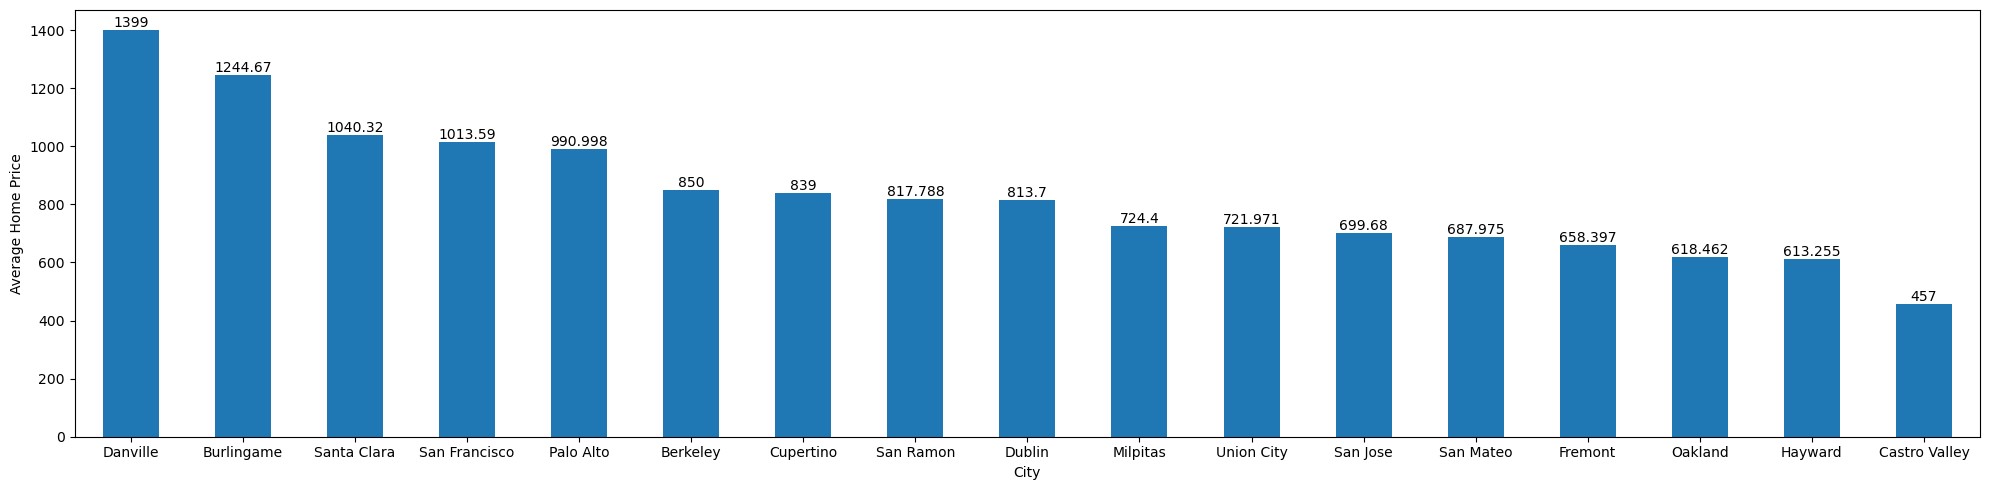

In [32]:
## Plotting Citywise home prices for all other houses
redfin_city_df = redfin_df.loc[(redfin_df['City'] != '_MISSING_') & (redfin_df['Beds'] <3) & (redfin_df['LivingArea'] < 1700)]
dataForPlot = redfin_city_df.groupby('City').mean()['List Price']/1000
dataForPlot = dataForPlot.sort_values(ascending=False)
ax = dataForPlot.plot(kind='bar', figsize=[20, 5])
ax.set_ylabel('Average Home Price')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# We can see from the above bar plot that the among all other houses, Danville, Santa Clara, San Francisco, Palo Alto, Cupertino,
# San Ramon have the highest prices
# Now, if we club the two chart above, we get the answer for our next question.

# Question 4: What are the costliest or the cheapest areas in Bay Area in terms of real estate?

# Answer: San Francisco, Palo Alto, Cupertino, San Ramon are the costliest while Hayward, Oakland, San Lorenzo are the cheapest

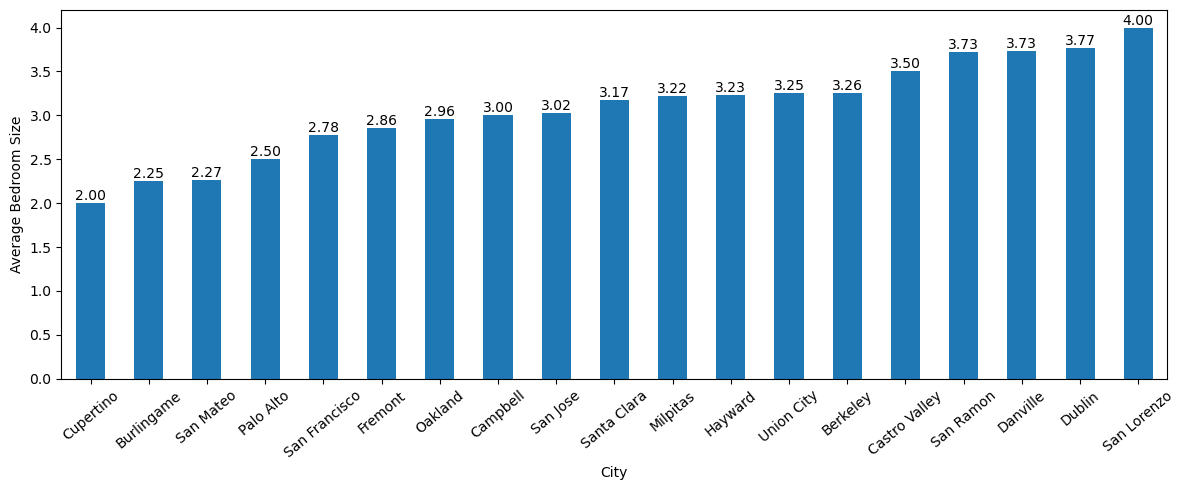

In [51]:
# Question 5: What is the average bedroom size in each of the cities of Bay Area?

# Distribution of homes
redfin_prop_df = redfin_df[redfin_df['City'] != '_MISSING_']
dataForPlot = redfin_prop_df.groupby('City').mean()['Beds']
dataForPlot = dataForPlot.sort_values(ascending=True)
ax = dataForPlot.plot(kind='bar', figsize=[12, 5])
ax.set_ylabel('Average Bedroom Size')
plt.xticks(rotation = 40)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')

plt.tight_layout()
plt.show()

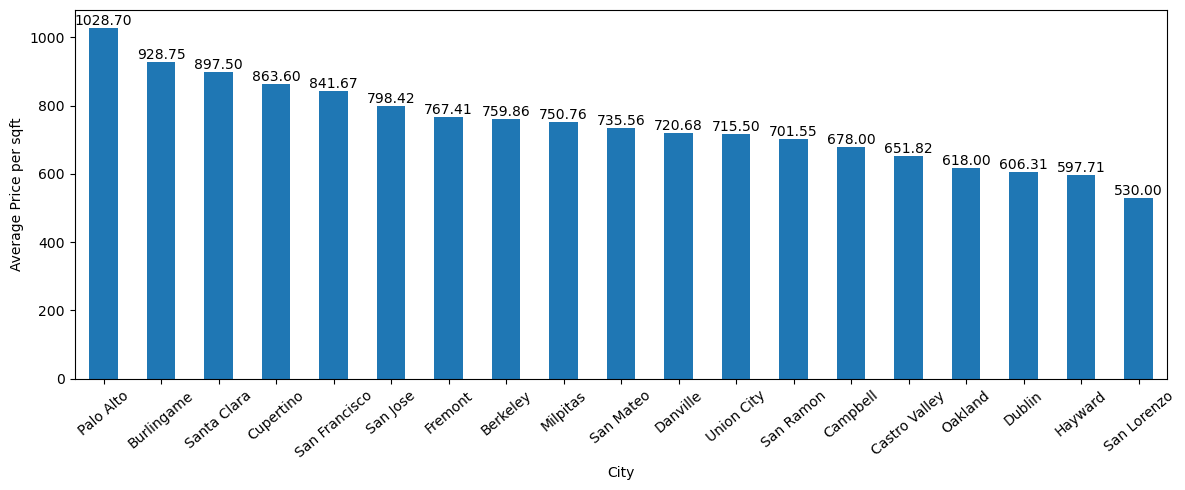

In [264]:
# Question 6: Which city has the highest/lowest average price per square foot?

# Distribution of homes
redfin_sqft_df = redfin_df[redfin_df['City'] != '_MISSING_']
dataForPlot = redfin_sqft_df.groupby('City').mean()['Price/SqFt']
dataForPlot = dataForPlot.sort_values(ascending=False)
ax = dataForPlot.plot(kind='bar', figsize=[12, 5])
ax.set_ylabel('Average Price per sqft')
plt.xticks(rotation = 40)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')

plt.tight_layout()
plt.show()

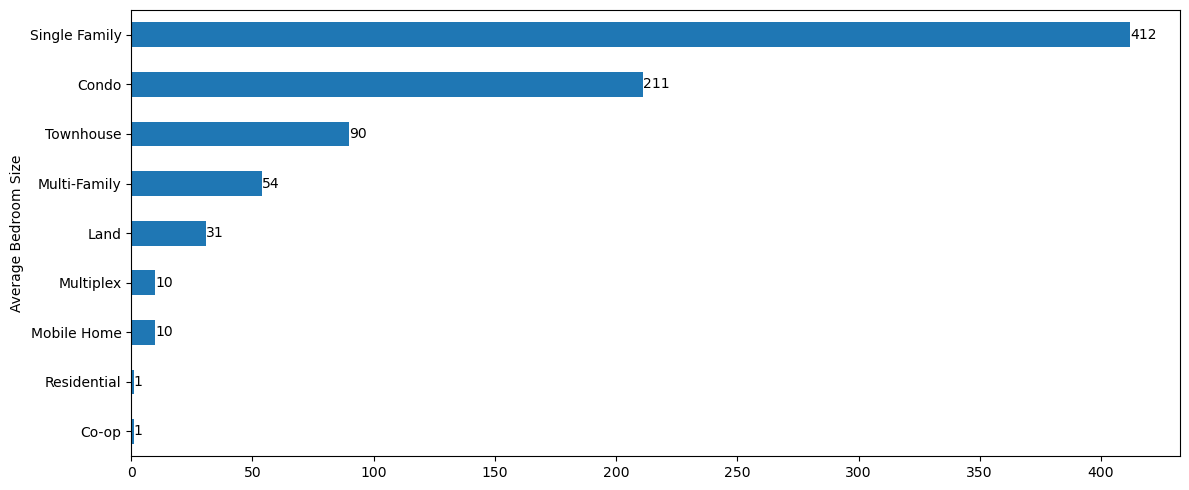

In [44]:
# Question 7: What is the most popular property type in Bay Area? /  What is the distribution of types of home in Bay Area?

# Distribution of homes
redfin_prop_df = redfin_df[redfin_df['Property Type'] != '_MISSING_']
dataForPlot = redfin_prop_df.groupby('Property Type').count()['Street Address']
dataForPlot = dataForPlot.sort_values(ascending=True)
ax = dataForPlot.plot(kind='barh', figsize=[12, 5])
ax.set_ylabel('Average Bedroom Size')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

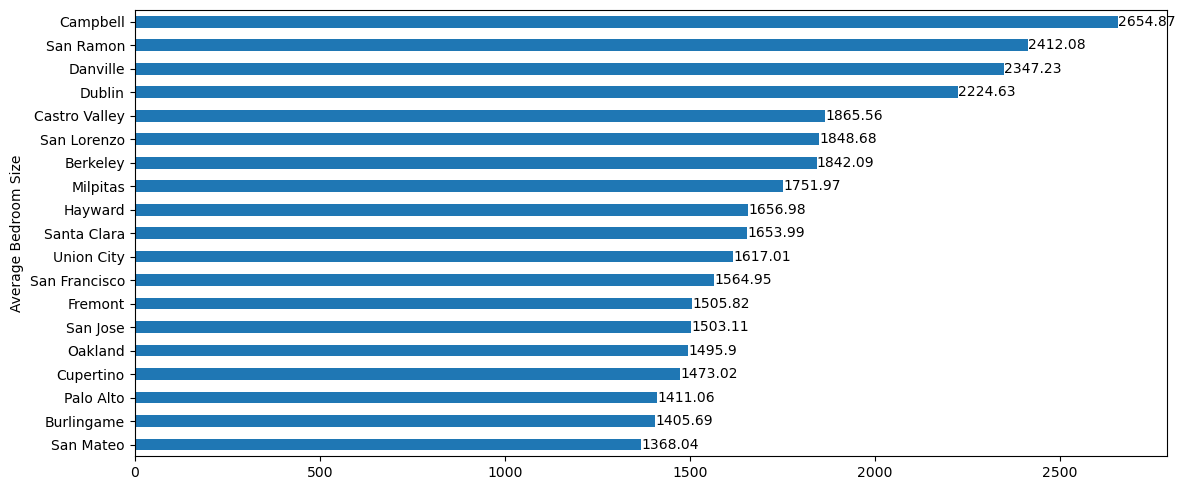

In [265]:
# Question 8: What is the average living area of properties in each city?

# Distribution of homes
redfin_prop_df = redfin_df[redfin_df['City'] != '_MISSING_']
dataForPlot = redfin_prop_df.groupby('City').mean()['LivingArea']
dataForPlot = dataForPlot.sort_values(ascending=True)
ax = dataForPlot.plot(kind='barh', figsize=[12, 5])
ax.set_ylabel('Average Bedroom Size')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# Answer: Single Family homes dominate the Bay Area while there are hardly any residential or co-operative housing 
# societies in Bay Area

<AxesSubplot:xlabel='Redfin Estimate', ylabel='List Price'>

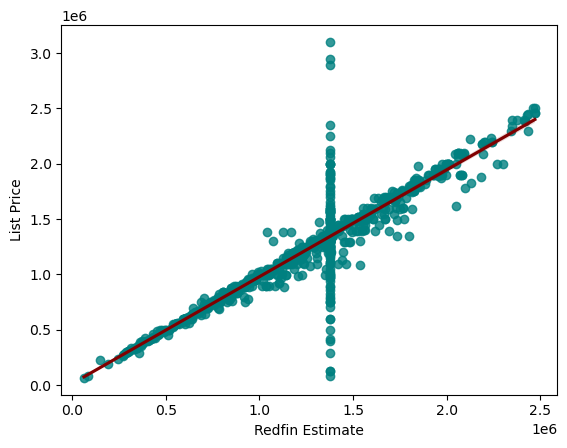

In [235]:
# Question 9: What is the correlation between the list price and the Redfin estimate of a property?

## Plotting scatter plot of List Price vs Redfin Estimates to show relationship between the two variables
sns.regplot(redfin_df['Redfin Estimate'],redfin_df['List Price'], scatter_kws={"color": "teal"}, line_kws={"color": "maroon"})

In [ ]:
# Answer: As we would expect, there is a linear relationship between Redfin Estimate and List Price

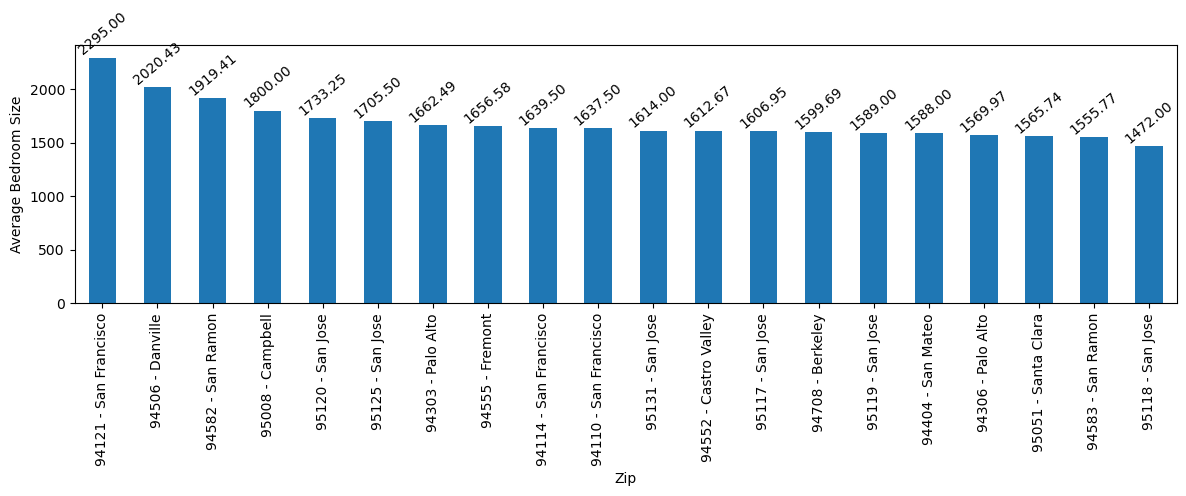

In [66]:
# Question 10: Which zip code has the highest average list price?

# Distribution of homes
redfin_prop_df = redfin_df[redfin_df['ZipCode'] != '_MISSING_']
redfin_prop_df['Zip'] = redfin_prop_df['ZipCode']+ ' - '+redfin_prop_df['City']
dataForPlot = redfin_prop_df.groupby('Zip').mean()['List Price']/1000
dataForPlot = dataForPlot.sort_values(ascending=False)[:20]
ax = dataForPlot.plot(kind='bar', figsize=[12, 5])
ax.set_ylabel('Average Bedroom Size')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f', rotation = 40)

plt.tight_layout()
plt.show()

In [ ]:
# Answer: 94121 which is the San Francisco County, is the Zip Code whith highest list price in Bay Area

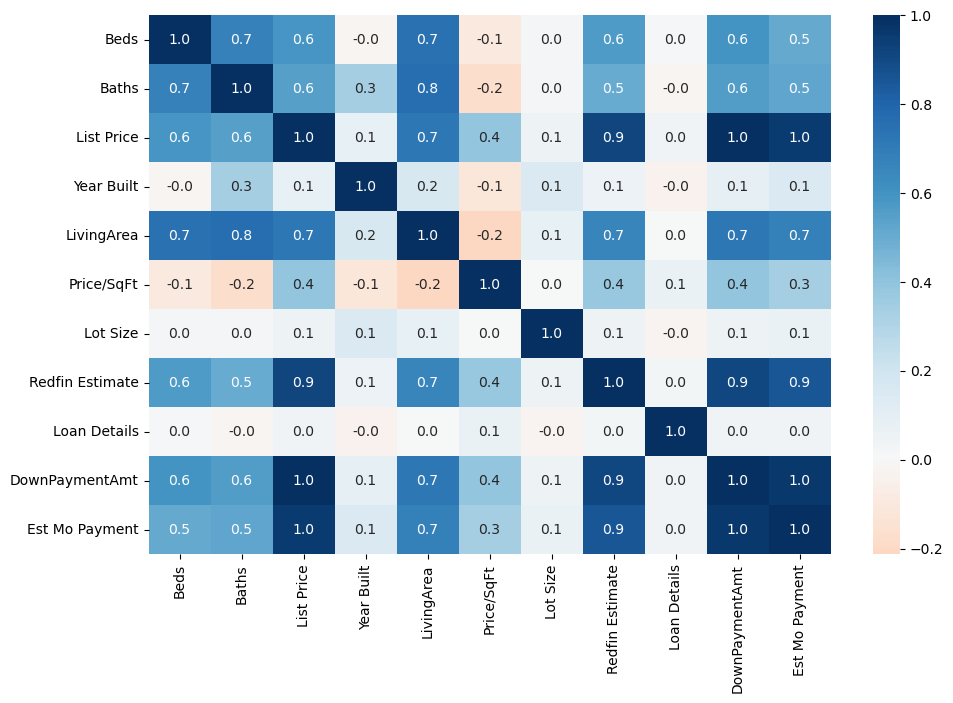

In [19]:
# Question 11: What are the most important factors that affect the value of a property?

redfin_nodp_df=redfin_df.drop(columns=['DownPaymentPercentage'])
corr = redfin_nodp_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [ ]:
# Answer: The heatmap above shows that no. of bedrooms, bathrooms, Living Area and Price per sq. ft. affects the list price

In [ ]:
# Question 12: Build regression models to predict the prices of properties and compare
# your prediction with Redfin Estimates and see which one is better or
# closer to real values. 

In [81]:
predictors = ['Beds', 'Baths', 'LivingArea', 'Lot Size', 'Property Type']
outcome = 'List Price'
redfin_nonmissing_df = redfin_df[(redfin_df['City'] != '_MISSING_') & (redfin_df['Property Type'] != '_MISSING_')]

# partition data
X = pd.get_dummies(redfin_nonmissing_df[predictors], drop_first=True)
y = redfin_nonmissing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

redfin_lm = LinearRegression()
redfin_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', redfin_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': redfin_lm.coef_}))

# print performance measures
regressionSummary(train_y, redfin_lm.predict(train_X))

intercept  -22925.900634952122
                      Predictor    coefficient
0                          Beds  -11069.727766
1                         Baths   63712.884410
2                    LivingArea     494.306443
3                      Lot Size       4.898744
4           Property Type_Condo  177365.873605
5            Property Type_Land -330049.587846
6     Property Type_Mobile Home -328297.171739
7    Property Type_Multi-Family  -11846.290328
8       Property Type_Multiplex  791483.281798
9     Property Type_Residential       0.000000
10  Property Type_Single Family  350594.199576
11      Property Type_Townhouse  168825.762482

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 311717.5534
            Mean Absolute Error (MAE) : 235197.6914
          Mean Percentage Error (MPE) : -11.5823
Mean Absolute Percentage Error (MAPE) : 26.9826


In [82]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
#print(pd.DataFrame(data)) #Good enough too. Variables appear in the same order in dataset 

# Reset the output width to the default. 
pd.reset_option('display.width')

     n     r2adj           AIC  Baths   Beds  LivingArea  Lot Size  Property Type_Condo  \
0    1  0.523102  16012.925191  False  False        True     False                False   
1    2  0.565070  15961.966763  False  False        True     False                False   
2    3  0.589469  15930.399096  False  False        True     False                False   
3    4  0.603357  15911.979884  False  False        True     False                False   
4    5  0.611647  15901.057343  False  False        True     False                False   
5    6  0.618659  15891.769830  False  False        True     False                False   
6    7  0.621276  15888.872948   True  False        True     False                False   
7    8  0.621030  15890.223765   True  False        True      True                False   
8    9  0.620590  15891.860893   True  False        True      True                 True   
9   10  0.620081  15893.597959   True   True        True      True                 True   

In [ ]:
# The best adjusted R^2 is 62.13% on training data so we pick the variables corresponding to those

In [133]:
predictors = ['Beds', 'LivingArea', 'Lot Size', 'Property Type','Redfin Estimate']
outcome = 'List Price'
redfin_nonmissing_df = redfin_df[(redfin_df['City'] != '_MISSING_') & (redfin_df['Property Type'] != '_MISSING_')]

# partition data
X = pd.get_dummies(redfin_nonmissing_df[predictors], drop_first=True)
y = redfin_nonmissing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
train_x = train_X.drop(columns=['Redfin Estimate'])
valid_x = valid_X.drop(columns=['Redfin Estimate'])
x = X.drop(columns=['Redfin Estimate'])
redfin_lm = LinearRegression()
redfin_lm.fit(train_x, train_y)

# print coefficients
print('intercept ', redfin_lm.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': redfin_lm.coef_}))

# print performance measures
regressionSummary(train_y, redfin_lm.predict(train_x))

intercept  -4892.229472022038
                      Predictor    coefficient
0                          Beds    5927.191276
1                    LivingArea     538.617247
2                      Lot Size       4.684954
3           Property Type_Condo  187707.621628
4            Property Type_Land -316753.449002
5     Property Type_Mobile Home -308811.270079
6    Property Type_Multi-Family   -9078.329225
7       Property Type_Multiplex  793809.224547
8     Property Type_Residential       0.000000
9   Property Type_Single Family  338102.586512
10      Property Type_Townhouse  195872.509097

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 313174.2251
            Mean Absolute Error (MAE) : 237295.1326
          Mean Percentage Error (MPE) : -11.8015
Mean Absolute Percentage Error (MAPE) : 27.2819


In [134]:
# Use predict() to make predictions on validation data
redfin_lm_pred = redfin_lm.predict(valid_x)

result = pd.DataFrame({'Predicted': redfin_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - redfin_lm_pred})

# Compute common accuracy measures
regressionSummary(valid_y, redfin_lm_pred)

        Predicted   Actual       Residual
8    1.089368e+06  1395000  305632.483497
271  5.937583e+05   834880  241121.717061
119  2.149371e+06  2225000   75628.928070
319  1.412570e+06   795000 -617569.514349
397  2.002883e+06  2095000   92117.310275
324  1.400576e+06   779000 -621575.607019
453  2.307686e+06  1949000 -358686.009361
791  1.903475e+06  1904995    1520.432633
47   1.670843e+06  1595000  -75842.616779
152  1.090448e+06  1149000   58551.935687
240  9.526809e+05  1300000  347319.119756
250  1.017367e+06  1208000  190633.058656
578  1.612051e+06  1198000 -414050.776040
247  1.069324e+06  1249000  179675.849806
802  1.150472e+06  1195000   44527.984000
570  7.030004e+05   935000  231999.628965
461  9.218608e+05   950000   28139.235452
102  1.331579e+06   998000 -333578.739450
438  6.849907e+05   290000 -394990.736707
659  7.264811e+05   650000  -76481.098400

Regression statistics

                      Mean Error (ME) : 10867.2475
       Root Mean Squared Error (RMSE) : 289

In [135]:
print('adjusted r2 : ', adjusted_r2_score(valid_y, redfin_lm_pred, redfin_lm))
# The adjusted R^2 for validation data is 61.46%

adjusted r2 :  0.6146235880897153


In [136]:
# Computing common accuracy measures for Redfin estimates of validation data.

# Root mean squared error (RMSE)
mse = mean_squared_error(valid_y, valid_X['Redfin Estimate'], squared = False)
print("Root Mean Squared Error (RMSE) : ", mse)

# Mean absolute error (MAE)
mae = mean_absolute_error(valid_y, valid_X['Redfin Estimate'])
print("Mean Absolute Error (MAE) : ", mae)

# Mean absolute percentage error (ME)
mape = mean_absolute_percentage_error(valid_y, valid_X['Redfin Estimate'])
print("Mean Absolute Percentage Error (MAPE) : ", mape)

# R-squared (coefficient of determination)
r2 = r2_score(valid_y, valid_X['Redfin Estimate'])
print("R-squared:", r2)

# adjusted R-squared (coefficient of determination)
adj_r2 = adjusted_r2_score(valid_y, valid_X['Redfin Estimate'], redfin_lm)
print("Adjusted R-squared:", adj_r2)

Root Mean Squared Error (RMSE) :  173353.8821034636
Mean Absolute Error (MAE) :  92738.92592592593
Mean Absolute Percentage Error (MAPE) :  0.07727761949736399
R-squared: 0.8681450235618332
Adjusted R-squared: 0.8618662151600157


In [ ]:
# The adjusted R^2 value for Redfin estimates is 86.187%. Thus redfin estimates are better than multiple linear regression results.
# The probable reason is that the price value of the house does not depend only on the variables considered.

In [ ]:
# Question 13: What are the properties of high priced houses in Bay Area?

# We will use clustering to find out what are the various properties of the cluster to which high priced houses belong

In [ ]:
redfin_pop_df = redfin_df.copy()

In [220]:
redfin_pop_df['High Price'] = np.where(redfin_df['List Price']>=1750000,1,0)

In [233]:
# Normalize the data columns
redfinpop_df_norm = (redfin_pop_df - redfin_pop_df.mean()) / redfin_pop_df.std()
redfinpop_df_norm = redfinpop_df_norm.drop(columns = ['City', 'DownPaymentPercentage', 'Property Type', 'ZipCode','Street Address', 'Popularity', 'List Price'])

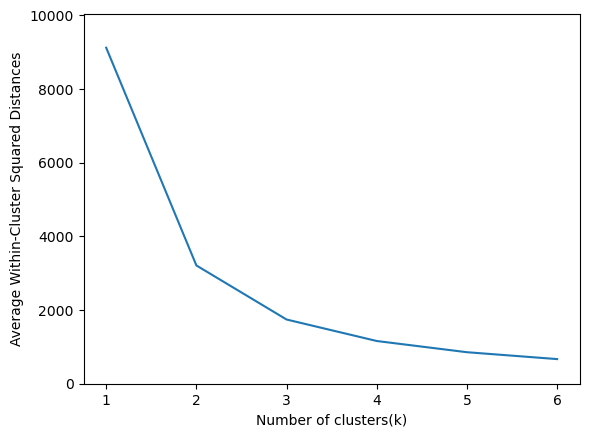

In [228]:
# Elbow curve to find the best number of clusters
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(redfinpop_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [229]:
# From the above elbow curve, we can go with k=3 for forming 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(redfinpop_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=redfinpop_df_norm.index)

In [230]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=redfinpop_df_norm.columns)

#Add 'Cluster number' column
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)
print(centroids)
#pd.set_option('display.precision', 3)

   Baths   Beds  DownPaymentAmt  Est Mo Payment  High Price  LivingArea  \
0 -0.773 -0.760          -0.914          -0.867      -0.403      -0.797   
1  0.468  0.445           0.325           0.288      -0.403       0.351   
2  0.799  0.835           1.671           1.650       2.479       1.245   

   Loan Details  Lot Size  Price/SqFt  Redfin Estimate  Year Built    Cluster  
0        -0.010    -0.086      -0.202           -0.878      -0.192  Cluster 0  
1        -0.022    -0.018       0.017            0.354       0.121  Cluster 1  
2         0.099     0.314       0.545            1.475       0.184  Cluster 2  


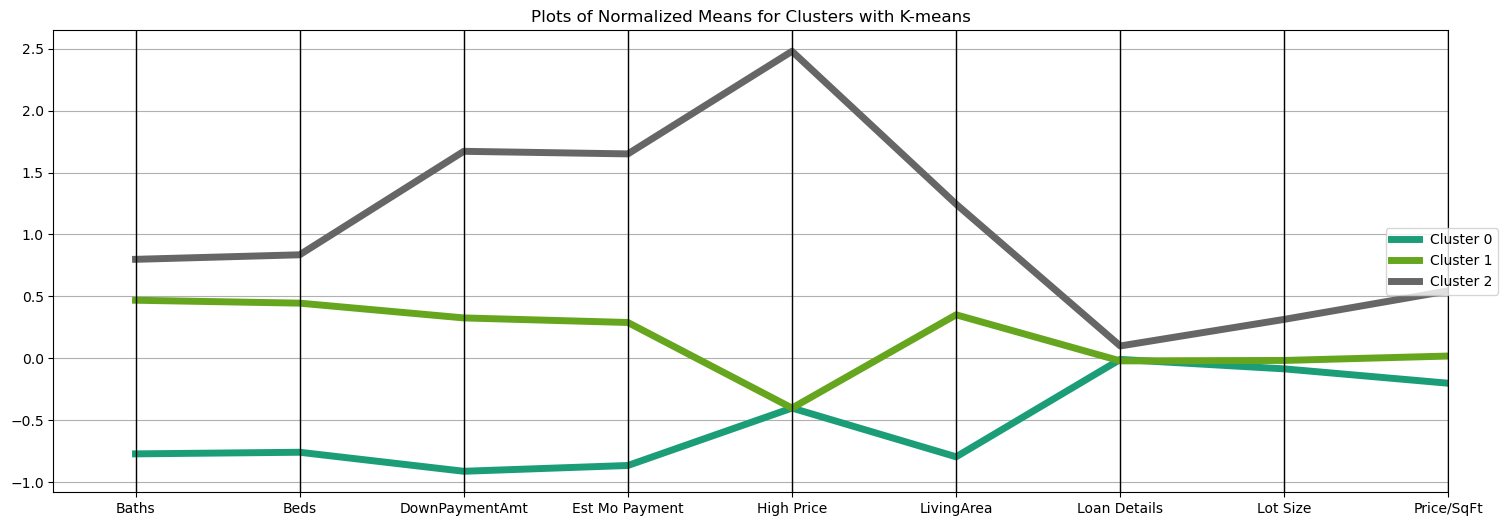

In [231]:
#Plot the means from kMeans clustering
plt.figure(figsize=(18,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,8)
plt.title('Plots of Normalized Means for Clusters with K-means')
plt.show()

In [ ]:
# Wherever all the parameters like bathrooms, bedrooms, downpaymentamount, loan, living area are high, the prices are high.